*Задание 5
Загрузите "wine dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные и тестовые.
Масштабируйте данные.
Постройте модель понижения размерности на тренировочный данных, визуализируйте с помощью диаграммы рассеяния, подберите оптимальные гиперпараметры, чтобы сегментов на графике было столько, сколько классов в данных.
С помощью модели кластеризации (поэкспериментируйте и с другими моделями, не только с KMeans) разбейте данные из тренировочного набора на необходимое количество кластеров.
Постройте диаграмму рассеяния на данных, полученных с помощью понижения размерности и раскрасьте точки из разных кластеров разными цветами.
Убедитесь с помощью визуализации, что разбиение данных из тестового набора получилось успешным.
Сделайте вывод, какие модели лучше себя показывают на этой задаче.


In [78]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_wine
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

warnings.filterwarnings('ignore')

In [31]:
data = load_wine()
feats = data['feature_names']
X= pd.DataFrame(data['data'], columns = feats)
y = pd.DataFrame(data['target'], columns = ['Class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)
X_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
131,12.88,2.99,2.40,20.0,104.0,1.30,1.22,0.24,0.83,5.40,0.74,1.42,530.0
140,12.93,2.81,2.70,21.0,96.0,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600.0
12,13.75,1.73,2.41,16.0,89.0,2.60,2.76,0.29,1.81,5.60,1.15,2.90,1320.0
16,14.30,1.92,2.72,20.0,120.0,2.80,3.14,0.33,1.97,6.20,1.07,2.65,1280.0
116,11.82,1.47,1.99,20.8,86.0,1.98,1.60,0.30,1.53,1.95,0.95,3.33,495.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,11.65,1.67,2.62,26.0,88.0,1.92,1.61,0.40,1.34,2.60,1.36,3.21,562.0
103,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0
67,12.37,1.17,1.92,19.6,78.0,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510.0
24,13.50,1.81,2.61,20.0,96.0,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845.0


In [76]:
scaler = MinMaxScaler()
X_train_sc = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_sc = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [161]:
def visual_test(labels, lr, X):
    tsne = TSNE(n_components=2, learning_rate=lr, random_state=42)
    X_train_tsne = tsne.fit_transform(X)
    
    plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c =labels)

    plt.show()

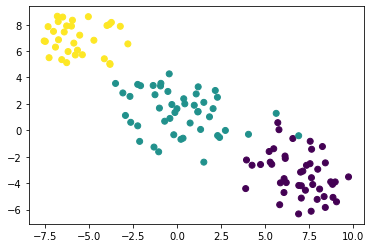

In [171]:
KM_mdl = KMeans(n_clusters=3, random_state=42, max_iter = 150)
train_labels = KM_mdl.fit_predict(X_train_sc)
visual_test(train_labels, 121,X_train_sc)

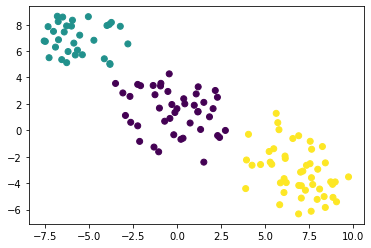

In [172]:
from sklearn.cluster import AgglomerativeClustering
AC = AgglomerativeClustering(n_clusters=3)
train_labels_AC = AC.fit_predict(X_train_sc)
visual_test(train_labels_AC, 121, X_train_sc)

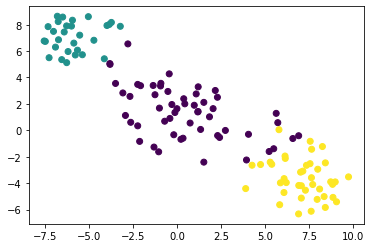

In [177]:
from sklearn.cluster import SpectralClustering
SC = SpectralClustering(n_clusters=3)
train_labels_SC = SC.fit_predict(X_train_sc)
visual_test(train_labels_SC, 121, X_train_sc)

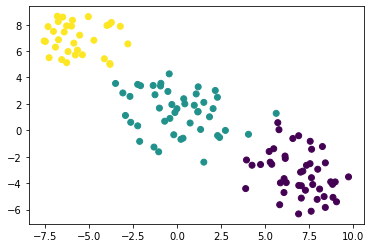

In [181]:
from sklearn.cluster import MiniBatchKMeans
MBK = MiniBatchKMeans(n_clusters=3, max_iter = 150)
train_labels_MBK = MBK.fit_predict(X_train_sc)
visual_test(train_labels_MBK, 121, X_train_sc)

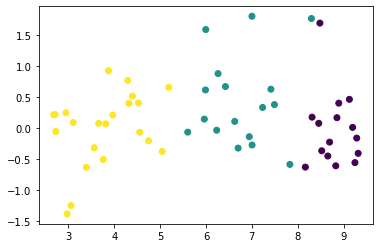

In [170]:
test_labels = KM_mdl.predict(X_test_sc)
visual_test(test_labels, 121,X_test_sc)

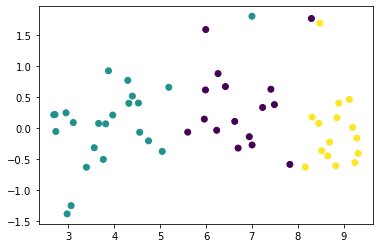

In [175]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_sc, train_labels_AC)

test_labels_AC = knn.predict(X_test_sc)
visual_test(test_labels_AC, 121,X_test_sc)

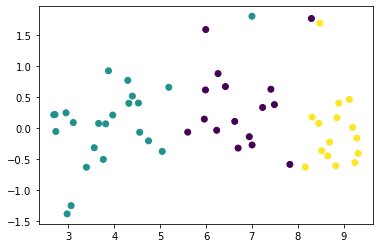

In [183]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_sc, train_labels_SC)

test_labels_SC = knn.predict(X_test_sc)
visual_test(test_labels_SC, 121,X_test_sc)

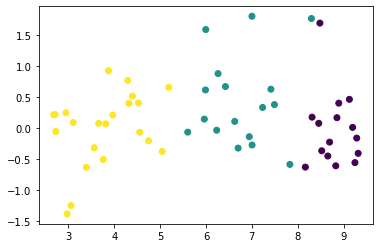

In [184]:
test_labels_MBK = MBK.predict(X_test_sc)
visual_test(test_labels_MBK, 121,X_test_sc)

Лучше всего себя показали модель KMeans и MiniBAtchMeans